In [129]:
import os
import pandas as pd

def read_data(file_path):
    # Open the file
    with open(file_path, 'r') as file:  # Use 'with' for automatic file closure

        # Split the text data into lines and remove extra whitespace
        lines = [line.strip() for line in file if line.strip()] 

        # Create a list to store data rows
        data = []

        # Process each line
        for line in lines:
            # Split the values in the line based on multiple spaces
            values = line.split()  
            
            # Convert values to floats
            values = [abs(float(val)) for val in values]

            # Add the row to the data list
            data.append(values)

    # Create a Pandas DataFrame
    column_names = [
        'absolute angle of inclination', 'angle of inclination', 'number of electrodes',
        'voltage magnitude', 'voltage frequency', 'electrode dimension',
        'x pitch', 'number of phases', 'grain mass density',
        'mesh size', 'gravity', 'phase shift', 'time step',
        'maximum classified radius', 'distance between dust generation and first electrode',
        'grain number density', 'yield'
    ]

    df = pd.DataFrame(data, columns=column_names)

    return df

def read_dataset_folder(folder_path):
    # Get a list of all files in the folder
    file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')] 

    # Create an empty list to store DataFrames
    all_dataframes = []

    # Read each file and append its DataFrame to the list
    for file_name in file_list:
        file_path = os.path.join(folder_path, file_name)
        df = read_data(file_path)
        all_dataframes.append(df)

    # Concatenate all DataFrames into a single DataFrame
    concatenated_df = pd.concat(all_dataframes, ignore_index=True)

    concatenated_df = concatenated_df.fillna(concatenated_df.mean())

    return concatenated_df

In [130]:
Folder_name = "Dataset"
data = read_dataset_folder(Folder_name)
data

,absolute angle of inclination,angle of inclination,number of electrodes,voltage magnitude,voltage frequency,electrode dimension,x pitch,number of phases,grain mass density,mesh size,gravity,phase shift,time step,maximum classified radius,distance between dust generation and first electrode,grain number density,yield
0,335.0,25.0,4.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.014511,1.0,3.738749
1,335.0,25.0,6.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.015185,1.0,2.602313
2,335.0,25.0,8.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.015858,1.0,2.719417
3,335.0,25.0,10.0,500.0,5.0,3.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.016532,1.0,1.865867
4,335.0,25.0,4.0,500.0,5.0,4.0,20.0,4.0,1000.0,0.001,3.0,90.0,0.005,0.00001,0.014011,1.0,6.512353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,50.0,50.0,4.0,2000.0,20.0,5.0,35.0,4.0,4000.0,0.001,12.0,90.0,0.005,0.00001,0.125134,1.0,1.085980
15849,50.0,50.0,6.0,2000.0,20.0,5.0,35.0,4.0,4000.0,0.001,12.0,90.0,0.005,0.00001,0.208557,1.0,0.112520
15850,50.0,50.0,8.0,2000.0,20.0,5.0,35.0,4.0,4000.0,0.001,12.0,90.0,0.005,0.00001,0.291980,1.0,0.014352
15851,50.0,50.0,10.0,2000.0,20.0,5.0,35.0,4.0,4000.0,0.001,12.0,90.0,0.005,0.00001,0.375402,1.0,0.003888


In [131]:
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15853 entries, 0 to 15852
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   absolute angle of inclination                         15853 non-null  float64
 1   angle of inclination                                  15853 non-null  float64
 2   number of electrodes                                  15853 non-null  float64
 3   voltage magnitude                                     15853 non-null  float64
 4   voltage frequency                                     15853 non-null  float64
 5   electrode dimension                                   15853 non-null  float64
 6   x pitch                                               15853 non-null  float64
 7   number of phases                                      15853 non-null  float64
 8   grain mass density                                    15

,absolute angle of inclination,angle of inclination,number of electrodes,voltage magnitude,voltage frequency,electrode dimension,x pitch,number of phases,grain mass density,mesh size,gravity,phase shift,time step,maximum classified radius,distance between dust generation and first electrode,grain number density,yield
count,15853.000000,15853.000000,15853.000000,15853.000000,15853.000000,15853.000000,15853.000000,15853.0,15853.000000,15853.000000,15853.000000,15853.0,1.585300e+04,15853.00000,15853.000000,15853.0,15853.000000
mean,169.610168,37.122311,6.881600,1234.214344,12.346244,4.846780,25.343153,4.0,2541.950543,0.001001,7.067562,90.0,5.000000e-03,0.00001,0.076090,1.0,8.943239
std,143.050633,12.494687,2.233962,555.286918,5.574810,0.896936,7.058939,0.0,1165.876131,0.000026,3.529182,0.0,6.889032e-21,0.00000,0.080131,0.0,12.460010
min,25.000000,25.000000,4.000000,500.000000,5.000000,3.000000,20.000000,4.0,1000.000000,0.001000,3.000000,90.0,5.000000e-03,0.00001,0.000000,1.0,0.000000
25%,25.000000,25.000000,4.000000,500.000000,5.000000,4.000000,20.000000,4.0,1000.000000,0.001000,3.000000,90.0,5.000000e-03,0.00001,0.020242,1.0,0.049272
50%,50.000000,25.000000,6.000000,1000.000000,10.000000,5.000000,20.000000,4.0,3000.000000,0.001000,6.000000,90.0,5.000000e-03,0.00001,0.033222,1.0,1.231272
75%,310.000000,50.000000,8.000000,1500.000000,15.000000,6.000000,30.000000,4.0,4000.000000,0.001000,9.000000,90.0,5.000000e-03,0.00001,0.114245,1.0,18.423616
max,335.000000,50.000000,10.000000,2000.000000,20.000000,6.000000,40.000000,4.0,4000.000000,0.002000,12.000000,90.0,5.000000e-03,0.00001,0.429031,1.0,63.634754


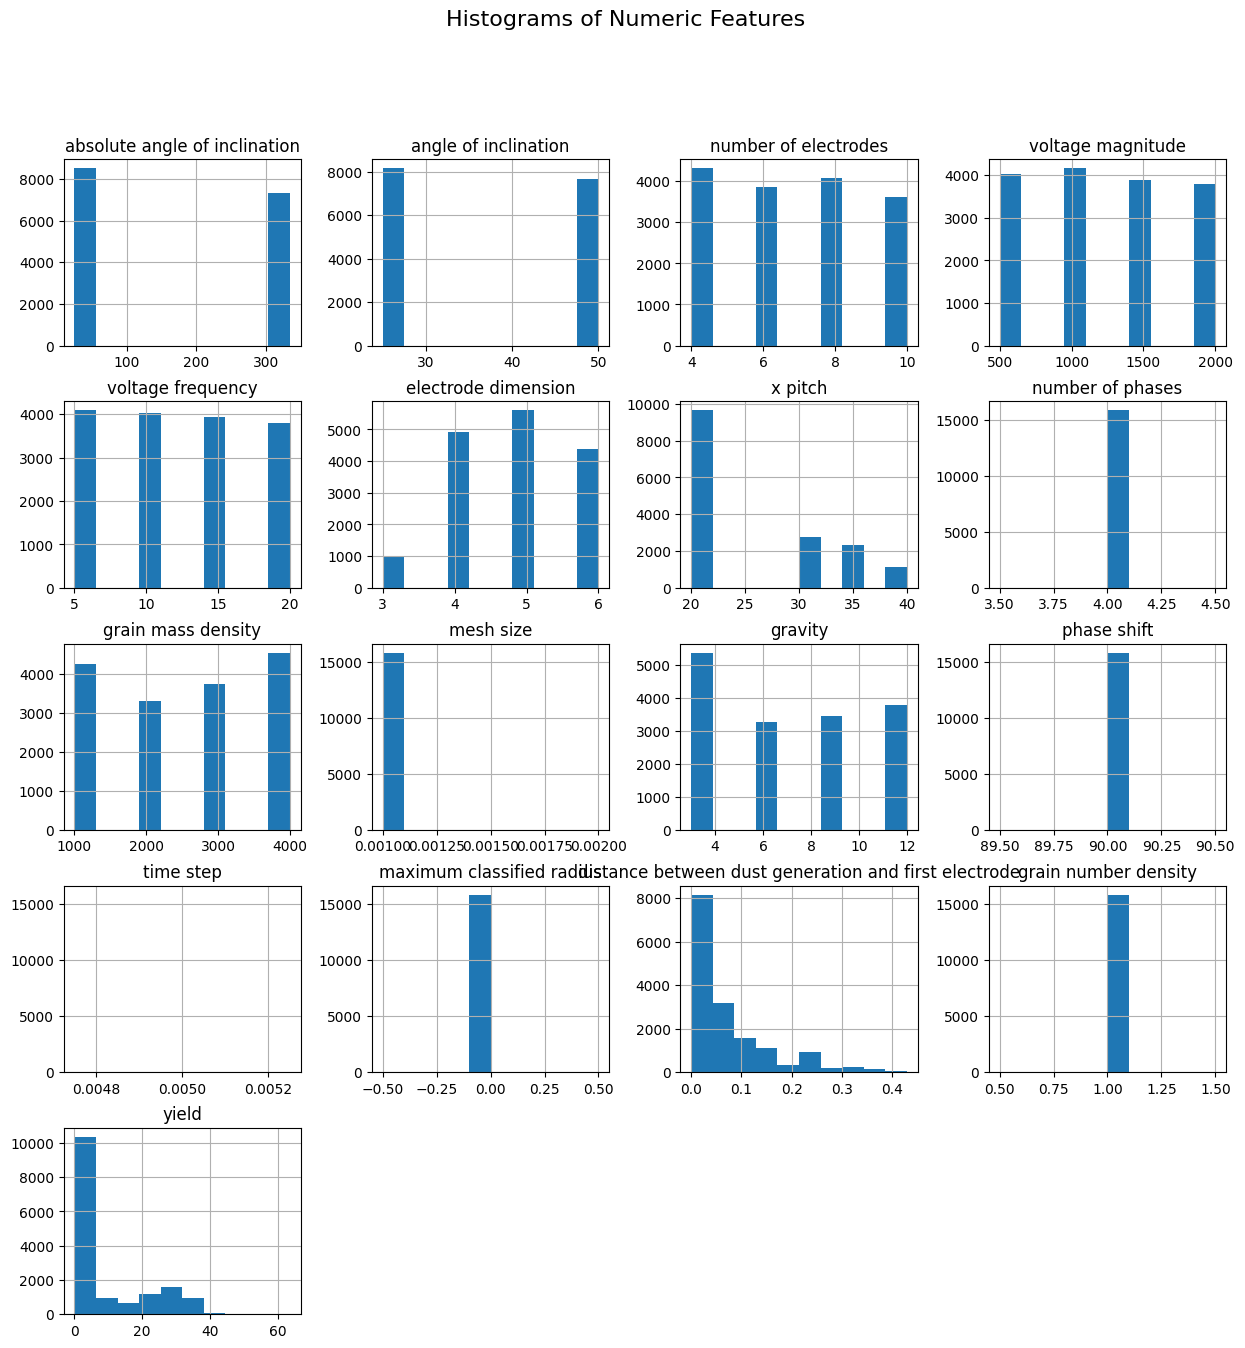

In [132]:
import matplotlib.pyplot as plt

numeric_features = data.select_dtypes(include=['float64'])
numeric_features.hist(figsize=(15, 15))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [88]:
numeric_features = ['absolute angle of inclination', 'voltage magnitude', 'voltage frequency',
                    'electrode dimension', 'x pitch', 'grain mass density',
                    'gravity', 'distance between dust generation and first electrode']
# Testing
numeric_features = ['absolute angle of inclination', 'number of electrodes', 'electrode dimension',
                    'x pitch', 'distance between dust generation and first electrode', 'voltage magnitude',
                    'voltage frequency', 'grain mass density', 'gravity']
ordinal_features = []
#ordinal_features = ['number of electrodes', ]
drop_features = ['number of phases', 'mesh size','phase shift', 
                 'time step', 'maximum classified radius', 'grain number density',
                 'angle of inclination'] # Angle removed to avoid multicollinearity
target = "yield"

In [89]:
from sklearn.model_selection import train_test_split
X = data.drop(target, axis=1)  # Features (independent variables)
y = data[target]                # Target (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder

numeric_transformer = StandardScaler()
ordinal_encoder = OrdinalEncoder()
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_encoder, ordinal_features),
    ('drop', drop_features),
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['absolute angle of inclination',
                                  'number of electrodes', 'electrode dimension',
                                  'x pitch',
                                  'distance between dust generation and first '
                                  'electrode',
                                  'voltage magnitude', 'voltage frequency',
                                  'grain mass density', 'gravity']),
                                ('ordinalencoder', OrdinalEncoder(), []),
                                ('drop', 'drop',
                                 ['number of phases', 'mesh size',
                                  'phase shift', 'time step',
                                  'maximum classified radius',
                                  'grain number density',
                                  'angle of inclination'])])

In [91]:
# Define RMSE calculation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [92]:
# Models to be evaluated
models = {
    'dummy': DummyRegressor(strategy='mean'),
    'linear_regression': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'polynomial2': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'polynomial3': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
    'polynomial4': make_pipeline(PolynomialFeatures(degree=4), LinearRegression()),
    #'polynomial5': make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
}

param_grid = {
    'ridge': {'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]},
    'lasso': {'lasso__alpha': [0.001, 0.01, 0.1, 1]}
}

In [93]:
import numpy as np

results_dict = {}  # dictionary to store all the results

# Fit models and perform hyperparameter tuning where applicable
for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    if name in param_grid:
        # Hyperparameter tuning with cross-validation
        grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring=make_scorer(rmse, greater_is_better=False), return_train_score=True)
        grid_search.fit(X_train, y_train)
        cv_results = grid_search.cv_results_
        best_index = grid_search.best_index_
        results_dict[name] = {
            'fit_time': np.mean(cv_results['mean_fit_time'][best_index]),
            'score_time': np.mean(cv_results['mean_score_time'][best_index]),
            'train_score': -cv_results['mean_train_score'][best_index],  # Convert to positive
            'test_score': -cv_results['mean_test_score'][best_index],     # Convert to positive
            'best_params': grid_search.best_params_
        }
    else:
        # Regular cross-validation
        cv_results = cross_validate(pipeline, X_train, y_train, cv=5,
                                    scoring=make_scorer(rmse, greater_is_better=False),
                                    return_train_score=True,
                                    return_estimator=True)
        results_dict[name] = {
            'fit_time': np.mean(cv_results['fit_time']),
            'score_time': np.mean(cv_results['score_time']),
            'train_score': -np.mean(cv_results['train_score']),  # Convert to positive
            'test_score': -np.mean(cv_results['test_score'])     # Convert to positive
        }

In [94]:
# Display the results
pd.DataFrame(results_dict).T

,fit_time,score_time,train_score,test_score,best_params
dummy,0.005333,0.002067,12.433589,12.433454,NaN
linear_regression,0.008796,0.002845,7.029961,7.03697,NaN
ridge,0.007327,0.002635,7.029961,7.036969,{'ridge__alpha': 1.0}
lasso,0.01303,0.004543,7.030056,7.036626,{'lasso__alpha': 0.01}
polynomial2,0.023362,0.00438,4.574759,4.597662,NaN
polynomial3,0.103267,0.008654,3.768892,3.92981,NaN
polynomial4,0.340052,0.016941,2.779438,1536028.471007,NaN


In [49]:
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['absolute angle of '
                                                   'inclination',
                                                   'voltage magnitude',
                                                   'voltage frequency',
                                                   'electrode dimension',
                                                   'x pitch',
                                                   'grain mass density',
                                                   'gravity',
                                                   'distance between dust '
                                                   'generation and first '
                                                   'electrode']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['number of electrodes']),
                                                 ('drop', 'drop',
                                                  ['number of phases',
                                                   'mesh size', 'phase shift',
                                                   'time step',
                                                   'maximum classified radius',
                                                   'grain number density',
                                                   'angle of inclination'])])),
                ('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=4)),
                                 ('linearregression', LinearRegression())]))])

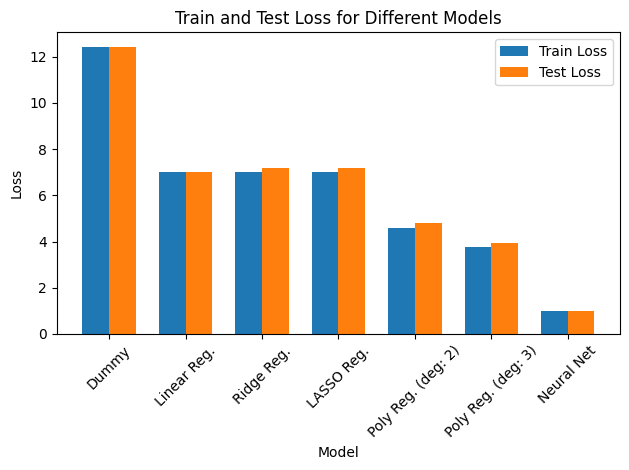

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Dummy', 'Linear Reg.', 'Ridge Reg.', 'LASSO Reg.', 'Poly Reg. (deg: 2)', 'Poly Reg. (deg: 3)', 'Neural Net']
train_loss = [12.433589, 7.0292736, 7.0292736, 7.030736, 4.574759, 3.768892, 1]
test_loss = [12.433454, 7.0293886, 7.203882, 7.203882, 4.797662, 3.92981, 1]

# Set bar width and positions for grouping
bar_width = 0.35
index = np.arange(len(models))

# Create bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(index, train_loss, bar_width, label='Train Loss')
rects2 = ax.bar(index + bar_width, test_loss, bar_width, label='Test Loss')

# Add labels, title, and legend
ax.set_xlabel('Model')
ax.set_ylabel('Loss')
ax.set_title('Train and Test Loss for Different Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45)
ax.legend()

# Add text labels on top of the bars (optional)
def addlabels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height,
                f'{height:.3f}', ha='center', va='bottom')

#addlabels(rects1)
#addlabels(rects2)

plt.tight_layout()
plt.show()


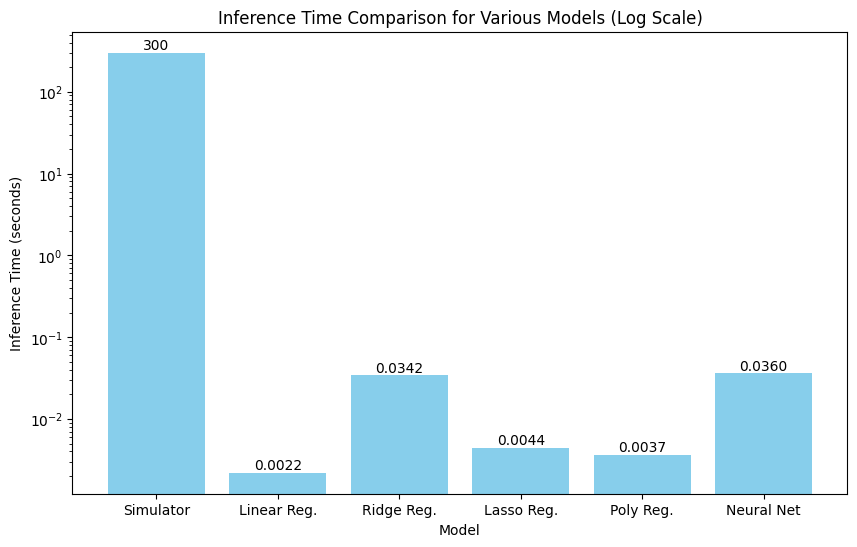

In [72]:
import matplotlib.pyplot as plt

# Data
models = ['Simulator', 'Linear Reg.', 'Ridge Reg.', 'Lasso Reg.', 'Poly Reg.', 'Neural Net']
times = [5*60, 0.0022, 0.0342, 0.00444, 0.00365, 0.036]  # Converting simulator time to seconds

# Creating the Plot
plt.figure(figsize=(10, 6))  # Adjust the size if needed

# Bar Plot for Better Visualization
plt.bar(models, times, color='skyblue')

# Y-axis in Logarithmic Scale for Large Time Differences
plt.yscale('log')  

plt.xlabel('Model')
plt.ylabel('Inference Time (seconds)')
plt.title('Inference Time Comparison for Various Models (Log Scale)')

# Annotations for Clarity
for i, v in enumerate(times):
    if v < 1:  # Adjust if needed for smaller values
        plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
    else:
        plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.show()
